 <h2><center>
    Lab 1 - Statistical Analysis of a questionair using  R </center></h1>
  <h2><center>
    Chouliaras Andreas 2143 achouliaras@inf.uth.com <br>
    Ονοματα και αεμ εδω + μαιλ
 </center></h1>

In [27]:
#install.packages("e1071")
#install.packages("ggplot2")
#install.packages("gdata")
#install.packages("plotrix")
#install.packages("xlsx")
library(xlsx)
library(e1071)
library(ggplot2)
library(gdata)
library(plotrix)

## Read the xlsx file and create a Data Frame

In [29]:
data_frame = read.xlsx2("QuestStudentRestaurant.xlsx",1,header=TRUE)
head(data_frame) 
#summary(data_frame)

ΑΑ,Φύλο,Ηλικία,Ευχαρίστηση,Ημέρα
1,1,23,1,4
2,2,22,4,2
3,1,20,4,4
4,2,18,2,1
5,2,20,3,5
6,1,21,4,3


## Split the men and women records into two Data Frames

In [30]:
men_frame = droplevels(subset(data_frame, Φύλο == 1))
head(men_frame)
#mean_men_age = mean(men_frame$Ηλικία)
#print(paste0("Mean age of men is equal to: ", mean_men_age))

women_frame = droplevels(subset(data_frame, Φύλο == 2))
head(women_frame)
#mean_women_age = mean(women_frame[,3])
#print(paste0("Mean age of women is equal to: ", mean_women_age))



,ΑΑ,Φύλο,Ηλικία,Ευχαρίστηση,Ημέρα
1,1,1,23,1,4
3,3,1,20,4,4
6,6,1,21,4,3
7,7,1,22,3,1
8,8,1,21,5,5
9,9,1,21,5,5


,ΑΑ,Φύλο,Ηλικία,Ευχαρίστηση,Ημέρα
2,2,2,22,4,2
4,4,2,18,2,1
5,5,2,20,3,5
12,12,2,18,1,7
14,14,2,20,4,5
15,15,2,20,5,5


## 1. Number of men and women. Relative frequencies of the two categories in a Pie chart.

[1] "The number of men is equal to: 564"
[1] "The number of women is equal to: 874"


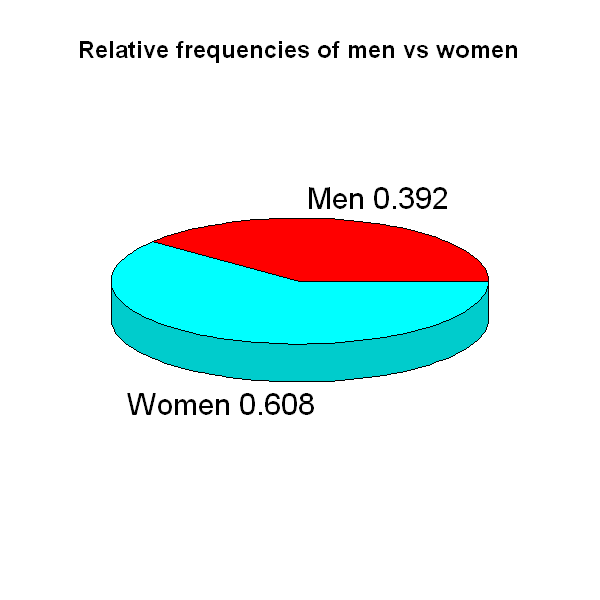

In [35]:
number_of_men = nrow(na.omit(men_frame))
number_of_women = nrow(na.omit(women_frame))

print(paste0("The number of men is equal to: ", number_of_men))
print(paste0("The number of women is equal to: ", number_of_women))

#plot
options(repr.plot.width=5, repr.plot.height=5)
slices <- c(number_of_men, number_of_women)
lbls <- c("Men", "Women")
pct <- round(slices/sum(slices),3)
lbls <- paste(lbls, pct) # add percents to labels
pie3D(slices,labels = lbls,main="Relative frequencies of men vs women")

## 2. Relative and cumulative frequencies of questionnaires per day

[1] "Relative frequencies of questionnaires per day: "

        1         2         3         4         5         6         7 
0.1300417 0.1717663 0.1091794 0.1738526 0.1105702 0.1439499 0.1606398 
[1] "Cumulative frequencies of questionnaires per day: "
   1    2    3    4    5    6    7 
 187  434  591  841 1000 1207 1438 


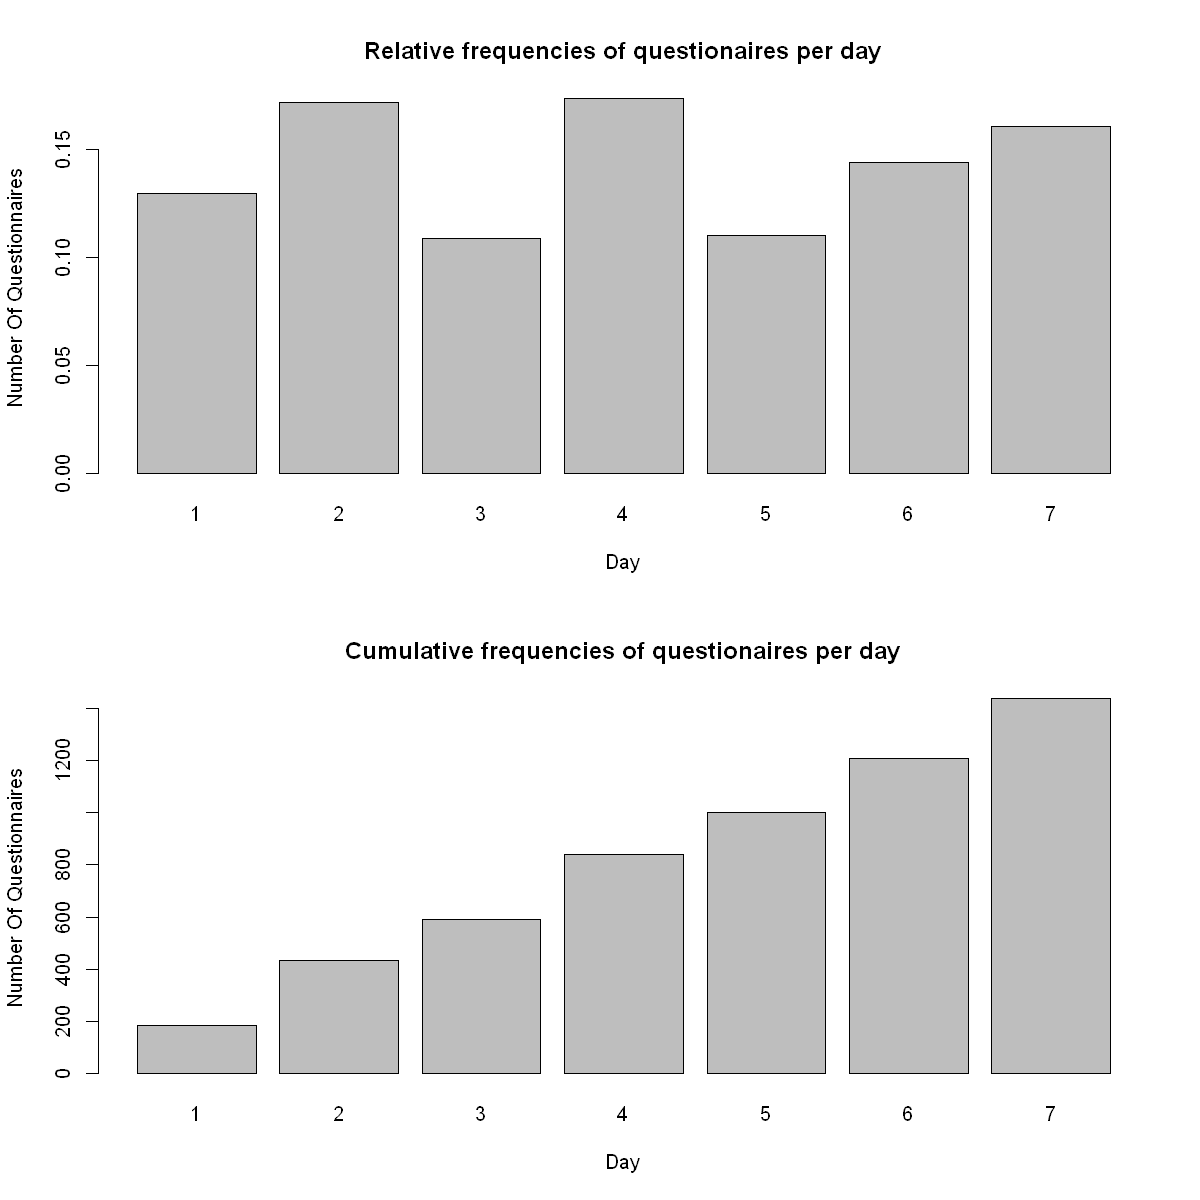

In [36]:
q_per_day = table(data_frame$Ημέρα)

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(2,1))
print("Relative frequencies of questionnaires per day: ")
print(q_per_day/nrow(data_frame))
barplot(q_per_day/nrow(data_frame), xlab = "Day", ylab = "Number Of Questionnaires",main="Relative frequencies of questionaires per day")

print("Cumulative frequencies of questionnaires per day: ")
print(cumsum(q_per_day))
barplot(cumsum(q_per_day), xlab = "Day", ylab = "Number Of Questionnaires",main="Cumulative frequencies of questionaires per day")
par(mfrow=c(1,1))

## 3. Mean degree of satisfaction per gender

In [40]:
mean_men_satisfaction_degree = mean(as.numeric(men_frame$Ευχαρίστηση))
print(paste0("Mean degree of satisfaction of men is equal to: ", mean_men_satisfaction_degree))

mean_women_satisfaction_degree = mean(as.numeric(women_frame$Ευχαρίστηση))
print(paste0("Mean degree of satisfaction of women is equal to: ", mean_women_satisfaction_degree))

[1] "Mean degree of satisfaction of men is equal to: 3.06914893617021"
[1] "Mean degree of satisfaction of women is equal to: 3.03432494279176"


## 4. Mean degree of satisfaction per gender and age

In [41]:
print("Mean degree of satisfaction per gender and age.")
agg1 = aggregate(as.numeric(men_frame[,4]),list(men_frame$Ηλικία),mean)
agg2 = aggregate(as.numeric(women_frame[,4]),list(women_frame$Ηλικία),mean)

df = cbind(agg1,agg2$x)
colnames(df) = c("Age","Men","Women")
df$Age = as.factor(df$Age)
transpose = t(df)
head(transpose)


[1] "Mean degree of satisfaction per gender and age."


Age,18,19,20,21,22,23,24,25,26,27
Men,3.291667,3.156863,2.964539,2.966667,2.945205,3.297297,2.428571,3.000000,2.000000,1.500000
Women,3.082707,3.100917,2.969072,3.045455,3.055118,3.091837,1.666667,2.000000,2.000000,5.000000


## 5. Mean degree of satisfaction per age and day

In [43]:
#install.packages("viridis")
library(viridis)

Day,Age,Mean_Satisfaction
1,18,2.758621
2,18,3.314286
3,18,3.040000
4,18,3.279070
5,18,3.285714
6,18,3.400000


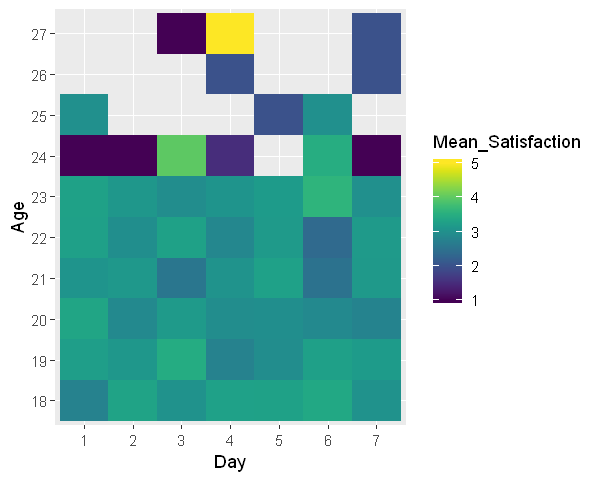

In [44]:
d5 = aggregate(as.numeric(data_frame$Ευχαρίστηση), list(data_frame$Ημέρα, data_frame$Ηλικία), mean)
colnames(d5) = c("Day","Age","Mean_Satisfaction")

#  Nomizw to eftiaksa
head(d5)

options(repr.plot.width=5, repr.plot.height=4)
ggplot(d5, aes(Day,Age,fill= Mean_Satisfaction))+
scale_fill_viridis(discrete=FALSE) +
geom_tile()


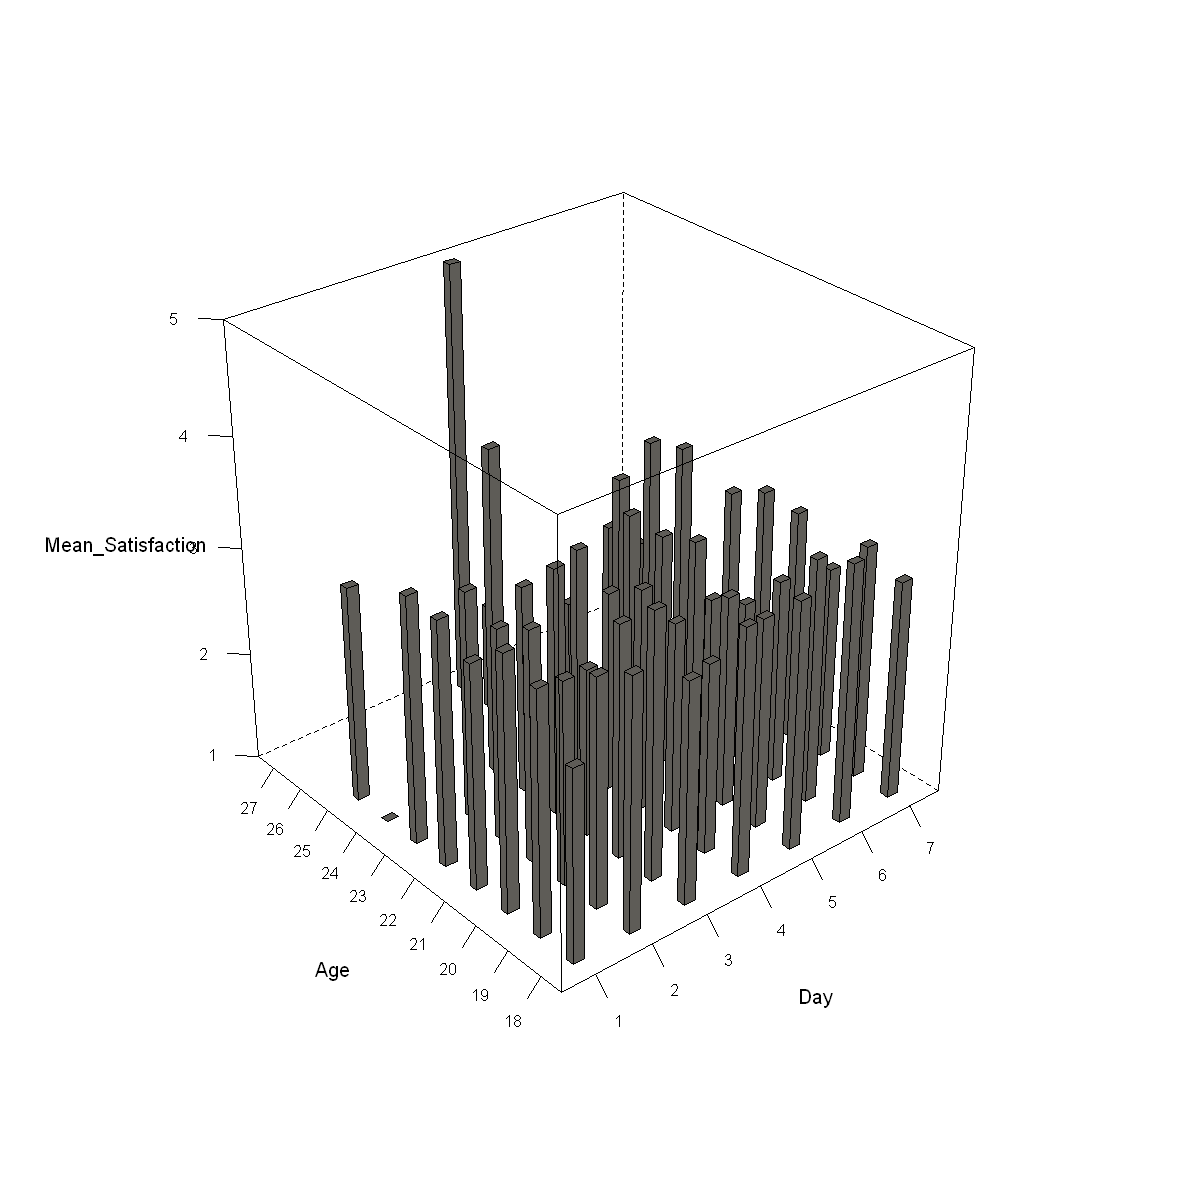

In [45]:
#install.packages("latticeExtra")
library(latticeExtra)

options(repr.plot.width=10, repr.plot.height=10)
cloud( Mean_Satisfaction ~ Day+Age, d5, panel.3d.cloud=panel.3dbars, col.facet='#5e5c57', 
      xbase=0.2, ybase=0.2, scales=list(arrows=FALSE, col=1), 
      par.settings = list(axis.line = list(col = "transparent")))


## 6. Mean degree of satisfaction per age and gender

In [46]:
print("Mean degree of satisfaction per age and gender.")
agg1 = aggregate(as.numeric(men_frame[,4]),list(men_frame$Ηλικία),mean)
agg2 = aggregate(as.numeric(women_frame[,4]),list(women_frame$Ηλικία),mean)
df = cbind(agg1,agg2$x)
colnames(df) = c("Age","Men","Women")
head(df)

[1] "Mean degree of satisfaction per age and gender."


Age,Men,Women
18,3.291667,3.082707
19,3.156863,3.100917
20,2.964539,2.969072
21,2.966667,3.045455
22,2.945205,3.055118
23,3.297297,3.091837


## 7. Number of men with degree of satisfaction equal to 4 or 5 on Monday or Friday

In [47]:
res = droplevels(subset(men_frame,  (Ευχαρίστηση == 4 | Ευχαρίστηση == 5) & (Ημέρα == 1 | Ημέρα == 5)))
num = nrow(res)
print(paste0("The number of men with satisfaction degree equal to 4 or 5 on days Monday and Friday is: ", num))

[1] "The number of men with satisfaction degree equal to 4 or 5 on days Monday and Friday is: 59"


## 8. Percentage of women with degree of satisfaction equal to 1 or 2 or 3 on Saturday or Sunday

In [48]:
res = droplevels(subset(women_frame,  (Ευχαρίστηση == 1 | Ευχαρίστηση == 2  | Ευχαρίστηση == 3) & (Ημέρα ==6  | Ημέρα == 7)))
num = round(nrow(res)/nrow(women_frame)*100,2)
print(paste0("The percentage of women with satisfaction degree from 1 to 3 on days Saturday or Sunday is: ", num," %"))

[1] "The percentage of women with satisfaction degree from 1 to 3 on days Saturday or Sunday is: 19.68 %"


## 9. Relative and accumulated frequencies of satisfaction per day

### Relative frequencies of satisfaction per day

[1] "The relative frequencies of satisfaction per day:"


Days,1,2,3,4,5
1,0.1604278,0.1711230,0.2299465,0.2245989,0.2139037
2,0.1943320,0.1538462,0.2388664,0.2348178,0.1781377
3,0.1528662,0.1592357,0.2802548,0.2292994,0.1783439
4,0.1640000,0.1960000,0.2800000,0.2120000,0.1480000
5,0.1383648,0.1949686,0.2767296,0.2075472,0.1823899
6,0.2077295,0.1545894,0.2318841,0.2318841,0.1739130
7,0.1948052,0.1991342,0.2121212,0.2251082,0.1688312


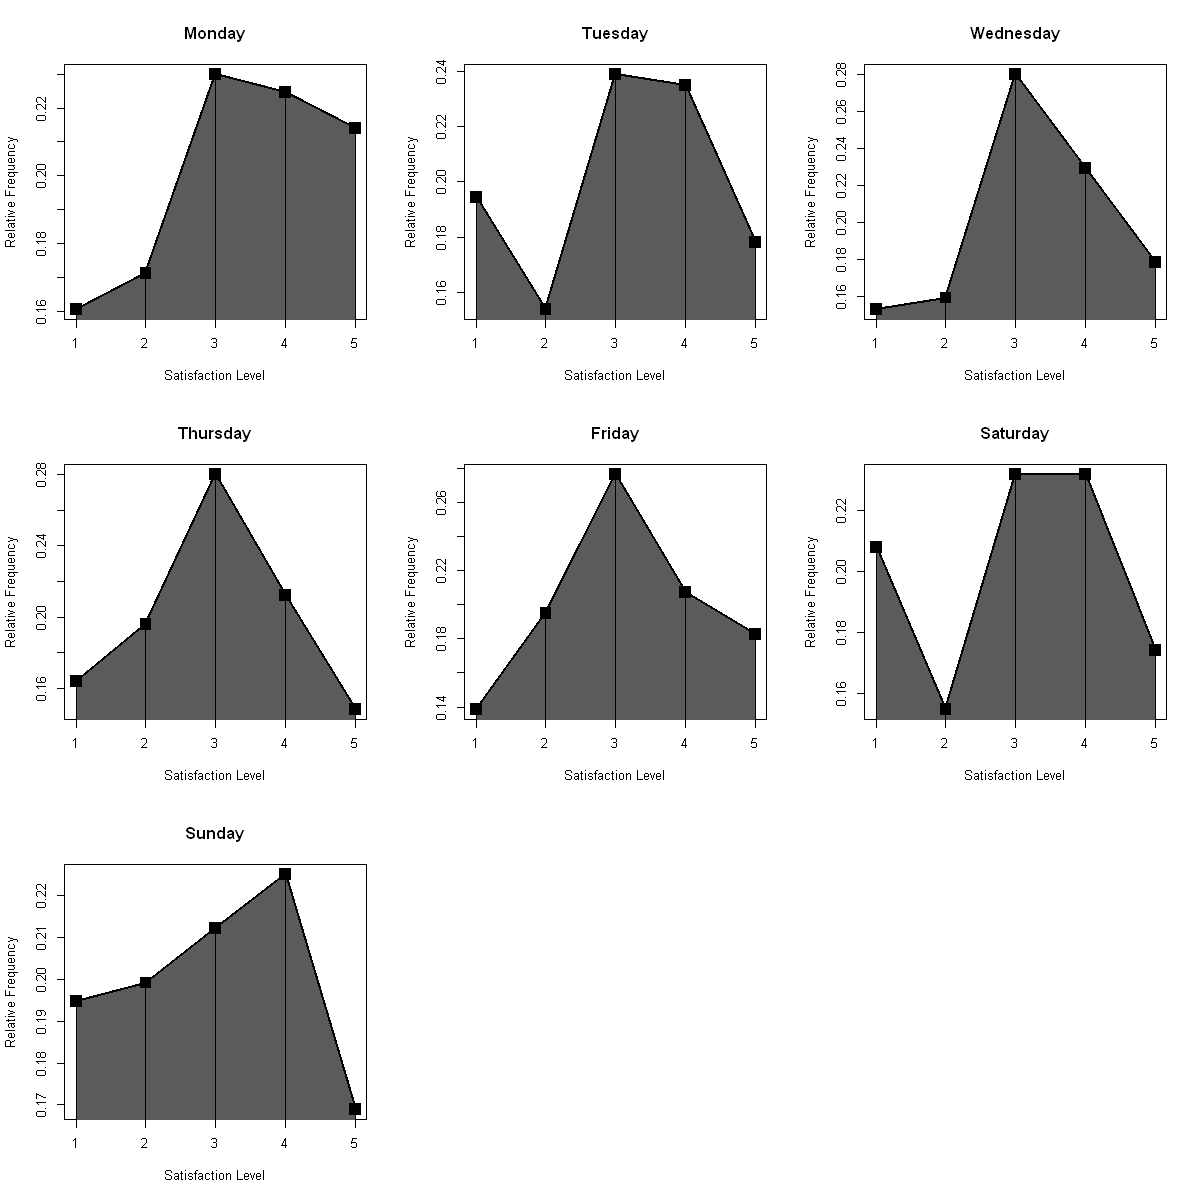

In [49]:
q_per_day = table(data_frame$Ημέρα,data_frame$Ευχαρίστηση)
r = c()
for (i in c(1:7)){
    r = rbind(r,q_per_day[i,]/sum(q_per_day[i,]))
}
r = as.data.frame(r)
freqs = cbind(c(1:7), r)
colnames(freqs)[1] = "Days"
print("The relative frequencies of satisfaction per day:")
freqs

names = c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
par(mfrow=c(3,3))

options(repr.plot.width=10, repr.plot.height=10)
for (i in c(1,2,3,4,5,6,7)){
    x1 = 1:5
    y1 = as.numeric(freqs[i,2:6])
    plot(x1, y1, type = "l", lwd = 3,xlab = "Satisfaction Level",ylab = "Relative Frequency",main=names[i])     
    polygon(c(1, x1, 5), c(0, y1, 0), col = "#5c5b59")  
    points(x1, y1, cex = 2,pch = 15)   
    segments(x1, 0, x1, y1)   
}
par(mfrow=c(1,1))

### Cumulative frequencies of satisfaction per day

[1] "The cumulative frequencies of satisfaction per day:"


Days,1,2,3,4,5
1,30,62,105,147,187
2,48,86,145,203,247
3,24,49,93,129,157
4,41,90,160,213,250
5,22,53,97,130,159
6,43,75,123,171,207
7,45,91,140,192,231


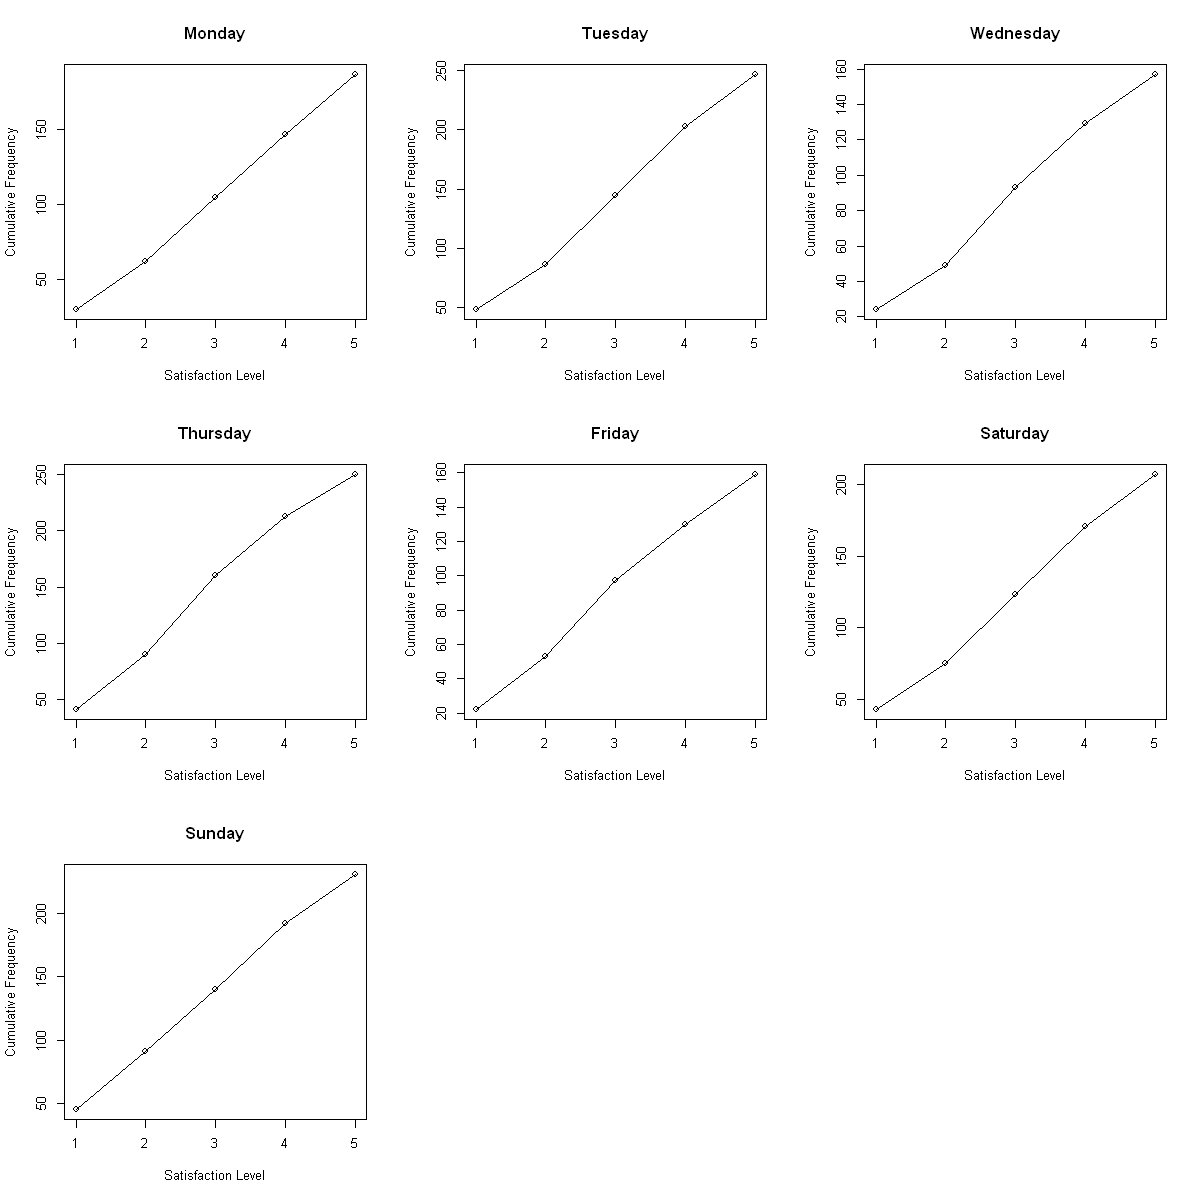

In [50]:
cu = c()
for (i in c(1:7)){
    cu = rbind(cu,cumsum(q_per_day[i,]))
}
cu = as.data.frame(cu)
cfreqs = cbind(c(1:7), cu)
colnames(cfreqs)[1] = "Days"
print("The cumulative frequencies of satisfaction per day:")
cfreqs

names = c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
par(mfrow=c(3,3))

options(repr.plot.width=10, repr.plot.height=10)
for (i in c(1,2,3,4,5,6,7)){
    x1 = 1:5
    y1 = as.numeric(cfreqs[i,2:6])
    plot(x1, y1, type = "l", lwd = 0.5,xlab = "Satisfaction Level",ylab = "Cumulative Frequency",main=names[i])     
    points(x1, y1,cex = 1,pch = 1) 
}
par(mfrow=c(1,1))
    

## 10. Mean degree of womens's satisfaction on Thursdays 

In [51]:
women_thursday = droplevels(subset(women_frame, Ημέρα == 4))
women_thursday_mean = mean(as.numeric(women_thursday$Ευχαρίστηση))
print(women_thursday_mean)

[1] 3.051613


## 11. Relative Frequencies of Satisfaction on Sundays

,1,2,3,4,5
7,0.1948052,0.1991342,0.2121212,0.2251082,0.1688312


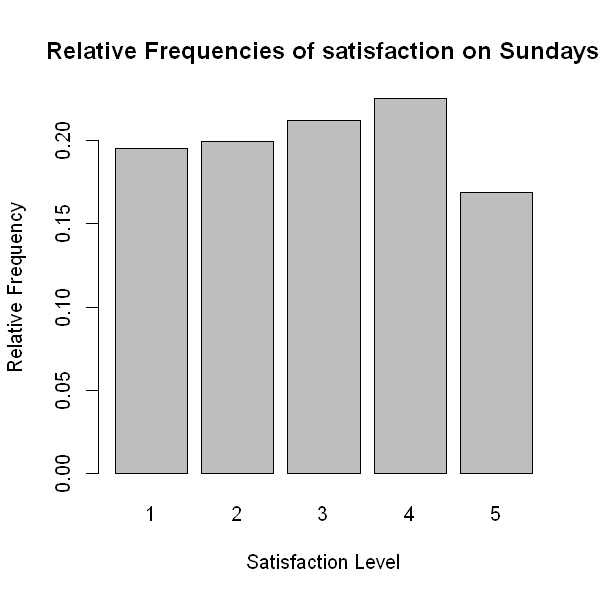

In [61]:
freqs[7,2:6]
options(repr.plot.width=5, repr.plot.height=5)
barplot(as.numeric(freqs[7,2:6]), xlab = "Satisfaction Level", ylab = "Relative Frequency", 
        main="Relative Frequencies of satisfaction on Sundays",names.arg =x1)

## 12. Days that the mean degree of satisfaction of women is greater than men

In [19]:
print("Mean satisfaction for men")
d12_men = aggregate(x = as.numeric(men_frame$Ευχαρίστηση), list(men_frame$Ημέρα), mean)
colnames(d12_men) = c("Day","Mean_Satisfaction")
d12_men

print("Mean satisfaction for women")
d12_women = aggregate(x = as.numeric(women_frame$Ευχαρίστηση), list(women_frame$Ημέρα), mean)
colnames(d12_women) = c("Day","Mean_Satisfaction")
d12_women

print("Difference in satisfaction between men and women")
diff = d12_women$Mean_Satisfaction - d12_men$Mean_Satisfaction
diff
names = c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

print("Days that the mean degree of satisfaction of women is greater than men:")
for(i in c(1,2,3,4,5,6,7)){
    if(diff[i]>0){
        print(names[i])
    }
}

[1] "Mean satisfaction for men"


Day,Mean_Satisfaction
1,3.029412
2,2.990566
3,3.140625
4,2.873684
5,3.394366
6,3.217391
7,2.978022


[1] "Mean satisfaction for women"


Day,Mean_Satisfaction
1,3.235294
2,3.092199
3,3.107527
4,3.051613
5,2.863636
6,2.905797
7,2.971429


[1] "Difference in satisfaction between men and women"


[1]  0.205882353  0.101632544 -0.033098118  0.177928693 -0.530729834
[6] -0.311594203 -0.006593407

[1] "Days that the mean degree of satisfaction of women is greater than men:"
[1] "Monday"
[1] "Tuesday"
[1] "Thursday"
